# Data Science I - Lab 5

**Author:** Pratik Mistry

**Date:** 07 December 2020

**GitHub Link:** https://github.com/pratikmistry96/Data-Science-I-Labs/tree/master/Lab%204

# Introduction

This lab is an introduction to unsupervised learning methods, specifically, clustering methods, like K-Means and Heirarchical Modeling

In [251]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

# Problems:

## 1) K-Means Practice
In this problem, you will generate simulated data, and then perform K-means clustering on the data.

### 1a) Generate a simulated data set with 20 observations in each of three classes (i.e. 60 observations total), and 50 variables.

In [252]:
# Simulate dataset with 60 samples, 50 features, and 3 clusters
X, y = make_blobs(n_samples = 60, n_features = 50, centers = 3, random_state = 96)
cluster_df = pd.DataFrame(y,columns=['truth'])

### 1b) Perform K-means clustering of the observations with K = 3. How well do the clusters that you obtained in K-means clustering compare to the true class labels (Hint: use pd.crosstab to make a contingency table of the results)?

In [253]:
# 1b) Perform k-means using K = 3
kmeans_k_3 = KMeans(n_clusters = 3,random_state = 8)
kmeans_k_3.fit(X)
cluster_df['k=3'] = kmeans_k_3.predict(X)

pd.crosstab(cluster_df['truth'],cluster_df['k=3'])

k=3,0,1,2
truth,,,
0,20,0,0
1,0,0,20
2,0,20,0


From the contigency table, we see that the predicted 3 clusters from the k means algorithm and the 3 truth cluster values all fall into 3 distinct combinations. 

Truth Cluster 0 = K Means Cluster 0

Truth Cluster 1 = K Means Cluster 2

Truth Cluster 2 = K Means Cluster 1

### 1c) Perform K-means clustering with K = 2. Describe your results

In [254]:
# 1b) Perform k-means using K = 3
kmeans_k_2 = KMeans(n_clusters = 2,random_state=8)
kmeans_k_2.fit(X)
cluster_df['k=2'] = kmeans_k_2.predict(X)

pd.crosstab(cluster_df['truth'],cluster_df['k=2'])

k=2,0,1
truth,,
0,0,20
1,20,0
2,0,20


From the contigency table, using 2 clusters for the k-means algorithm, we see that there are not 3 distinct clusters, and that the ground truth clusters of 0 and 2 are grouped into one cluster from the k-means algorithm and the that the ground truth cluster of 2 matches the k-means cluster id of 1.

Ground Truth Cluster 0 & 2 = K Means Cluster 0

Ground Truth Cluster 1 = K Means Cluster 1

### 1d) Now perform K-means clustering with K = 4 and describe your results

In [255]:
# 1d) Perform k-means using K = 4
kmeans_k_4 = KMeans(n_clusters = 4,random_state=8)
kmeans_k_4.fit(X)
cluster_df['k=4'] = kmeans_k_4.predict(X)

pd.crosstab(cluster_df['truth'],cluster_df['k=4'])

k=4,0,1,2,3
truth,,,,
0,20,0,0,0
1,0,0,20,0
2,0,9,0,11


From this contigency table, we see the k-means clustering algorithm with 4 clusters overperformed. The truth clusters of 0 and 1 fall perfectly into the k-means clusters of 0 and 2. However, the truth cluster of 1 is split into 2 separate clusters in the k-means of 1 and 3.

### 1e) Perform K-means clustering with K = 3 on the data after scaling each variable to have standard deviation one. How do these results compare to those obtained in (c)? Explain

In [256]:
scaler = StandardScaler()
scaler.fit(X)
X_scale = scaler.transform(X)

kmeans_k_3_scale = KMeans(n_clusters = 3,random_state=8)
kmeans_k_3_scale.fit(X_scale)

cluster_df['norm_k=3'] = kmeans_k_3_scale.predict(X_scale)

pd.crosstab(cluster_df['truth'],cluster_df['norm_k=3'])

norm_k=3,0,1,2
truth,,,
0,20,0,0
1,0,0,20
2,0,20,0


After scaling the data and using 3 clusters for the k-means algorithm, it seems that the truth clusters and the predict k-means cluster are perfectly separated into three distinct clusters that are exactly the same as the results from 1b.

## 2) Heirarchical Clustering
Use the gene expression data in ‘Ch10Ex11.csv’. This is gene expression data that consists of 40 tissue samples with measurements on 1,000 genes. The first 20 samples are from healthy patients, while the second 20 are from a diseased group.

### 2a) Load the data – note that there is no header so you will need to read this in without one. 

In [257]:
# Load the dataset with no header
gene_data = pd.read_csv('Ch10Ex11.csv', header = None)
# Transpose the data so the genes are the features instead of the samples
gene_data = gene_data.transpose()

### 2b) Apply hierarchical clustering to the samples. Use all combinations of correlation and Euclidian distance with single, average and complete linkage. Plot the dendrograms. Do the genes separate the samples into the two groups? Do the results change with distance and linkage? How? 

#### Linkage = Complete | Metric = Euclidean

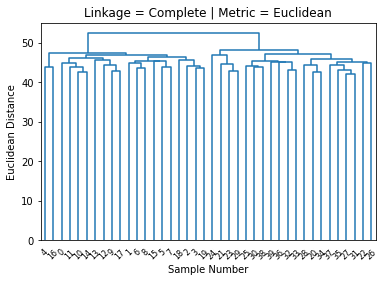

In [258]:
eluc_complete = shc.dendrogram(shc.linkage(gene_data, metric = 'euclidean', method = 'complete'))
plt.xlabel('Sample Number')
plt.ylabel('Euclidean Distance')
plt.title('Linkage = Complete | Metric = Euclidean')
plt.show()

This heirarchical clustering method using the 'complete' linkage method and 'euclidean' as the metric shows that there are two clusters at a distance around 50.

#### Linkage = Single | Metric = Euclidean

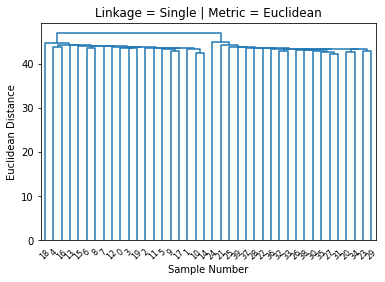

In [259]:
eluc_single = shc.dendrogram(shc.linkage(gene_data, metric = 'euclidean', method = 'single'))
plt.xlabel('Sample Number')
plt.ylabel('Euclidean Distance')
plt.title('Linkage = Single | Metric = Euclidean')
plt.show()

This heirarchical clustering method using the 'single' linkage method and 'euclidean' as the metric shows that there are two clusters at a distance around 47-50.

#### Linkage = Average | Metric = Euclidean

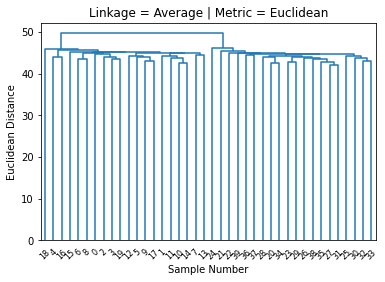

In [260]:
eluc_average = shc.dendrogram(shc.linkage(gene_data, metric = 'euclidean', method = 'average'))
plt.xlabel('Sample Number')
plt.ylabel('Euclidean Distance')
plt.title('Linkage = Average | Metric = Euclidean')
plt.show()

This heirarchical clustering method using the 'average' linkage method and 'euclidean' as the metric shows that there are two clusters at a distance around 48.

#### Linkage = Complete | Metric = Correlation

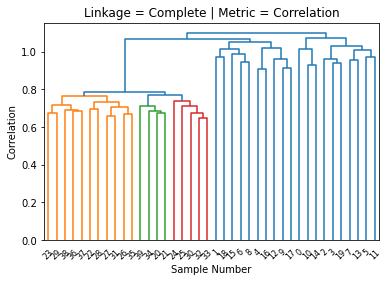

In [261]:
corr_complete = shc.dendrogram(shc.linkage(gene_data, metric = 'correlation', method = 'complete'))
plt.xlabel('Sample Number')
plt.ylabel('Correlation')
plt.title('Linkage = Complete | Metric = Correlation')
plt.show()

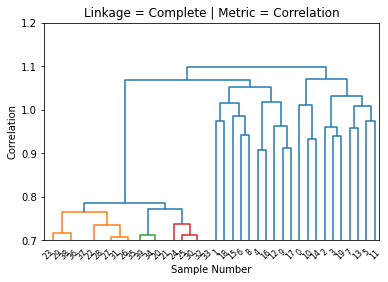

In [262]:
corr_complete = shc.dendrogram(shc.linkage(gene_data, metric = 'correlation', method = 'complete'))
plt.xlabel('Sample Number')
plt.ylabel('Correlation')
plt.title('Linkage = Complete | Metric = Correlation')
plt.ylim([0.7,1.2])
plt.show()

This heirarchical clustering method using the 'complete' linkage method and 'correlation' as the metric shows that there are two clusters above a value of 1, which doesn't make sense because you cannot have a correlation value > 1 or < -1

#### Linkage = Single | Metric = Correlation

Text(0.5, 1.0, 'Linkage = Single | Metric = Correlation')

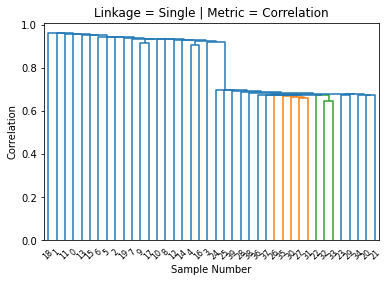

In [263]:
corr_single = shc.dendrogram(shc.linkage(gene_data, metric = 'correlation', method = 'single'))
plt.xlabel('Sample Number')
plt.ylabel('Correlation')
plt.title('Linkage = Single | Metric = Correlation')

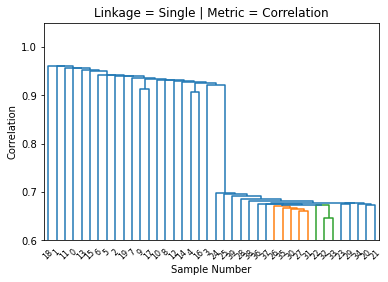

In [264]:
corr_single = shc.dendrogram(shc.linkage(gene_data, metric = 'correlation', method = 'single'))
plt.xlabel('Sample Number')
plt.ylabel('Correlation')
plt.title('Linkage = Single | Metric = Correlation')
plt.ylim([0.6,1.05])
plt.show()

This heirarchical clustering method using the 'single' linkage method and 'correlation' as the metric does not show two distinct clusters 

#### Linkage = Average | Metric = Correlation

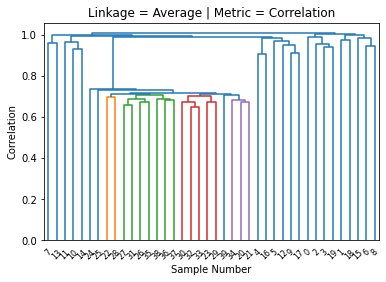

In [265]:
corr_average = shc.dendrogram(shc.linkage(gene_data, metric = 'correlation', method = 'average'))
plt.xlabel('Sample Number')
plt.ylabel('Correlation')
plt.title('Linkage = Average | Metric = Correlation')
plt.show()

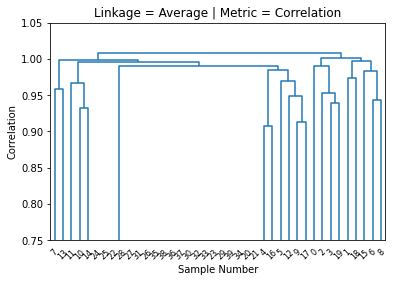

In [266]:
corr_average = shc.dendrogram(shc.linkage(gene_data, metric = 'correlation', method = 'average'))
plt.xlabel('Sample Number')
plt.ylabel('Correlation')
plt.title('Linkage = Average | Metric = Correlation')
plt.ylim([0.75,1.05])
plt.show()

**Answer:**

The hierarchical clustering methods using Euclidean distance have two distinct clusters around a distance of 45 across all the difference linkage methods. However, it's not as clear with the clustering methods that use correlation as the metric to create two distance clusters. With the correlation metric, one can identify two clusters when using a correlation value greater 1, which doesn't make much sense, so I would argue the correlation matrix does a worse job producing two separate clusters.